# ギブスサンプリングについて

* $p(\bf{x}|\theta) = \frac{1}{Z(\theta)} \exp(-\Phi(\bf{x}, \theta))$ 
* $\bf{x} = \left\{ x_1, x_2, x_3, \dots, x_N \right\}$

についての同時確率分布

* $\bf{x} = \left\{ x_1, x_2, x_3, \dots, x_N \right\}$

からのサンプリング

* たとえば，ボルツマンマシンではそれぞれのユニットが2値ユニットなので，$O(2^n)$

### ギブスサンプリング

* $x_i$以外の確率変数を固定して，確率変数$x_i$に関してだけのサンプリングをすれば良い．
* $p(\bf{x})$からサンプリングする代わりに$p(x_i|\bf{x^{\backslash i}})$を別々にサンプリングする．
* ただし，$\bf{x^{\backslash i}}$は$\bf{x}$から${x_i}$を除いた集合

##### t回目のサンプリングは(t-1)回目のサンプリング結果を使って行う
* 任意回数(tとする)サンプリングを行う

$ p(x_i^{(0)}) $ はランダムに初期化する

$ p(x_i) \  ( i \in \left\{ 1, 2, \dots, M \right\} )$ を順番にサンプリングしていく

$t$回サンプリングする

$ x_i^{(t)} \sim p(x_i^{(t)} | x_1^{(t)}, x_2^{(t)}, \dots, x_{i-1}^{(t)}, x_{i+1}^{(t-1)}, \dots, x_M^{(t-1)}) $

##### Burn-inという概念
* tが小さい時のサンプリング結果は，ランダムに初期化した各変数に依存している．
* 初期値に依存したサンプルが得られる期間をburn-inといい，この期間のサンプルは破棄すべきである．

## 正規分布での実験

### 前提

* 多変数の正規分布は1変数の正規分布の積で表せる
    - 詳しくはPRMLを参照してください
    
### 多変量の正規分布

* $ \sum $ は分散共分散行列
* $ \mu $ は平均ベクトル

$ p(x) = \frac{1}{2\pi \left| \sum \right|^{\frac{1}{2}}} exp \Biggl[- \frac{1}{2} (\bf{x}-\bf{\mu})^T \sum^{-1} (\bf{x}-\bf{\mu}) \Bigg] $

### パラメータの値

* $ a = 0.8 $
* $ \mu = \bf{0} $
* $ \sum ^ {-1} = \begin{bmatrix}1 & -a\\-a & 1\end{bmatrix}$

In [13]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.style.use('ggplot')

a = 0.8
num_iter = 30000
cov_inv = [[ 1,  -a],[-a,  1]]
mu_x = numpy.array([0, 0])
cov = numpy.linalg.pinv(cov_inv)

CPU times: user 2.05 s, sys: 14.2 ms, total: 2.07 s
Wall time: 2.07 s


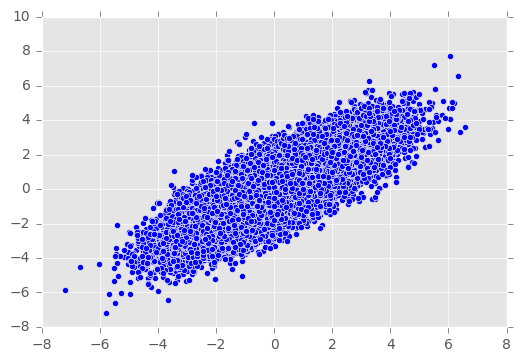

In [14]:
%%time

# normal sampling

x_1 = []
x_2 = []

for _ in range(num_iter):
    data = numpy.random.multivariate_normal(mu_x, cov, 1)
    x_1.append(data[0][0])
    x_2.append(data[0][1])
pyplot.scatter(list(x_1), list(x_2))

CPU times: user 418 ms, sys: 5.54 ms, total: 423 ms
Wall time: 425 ms


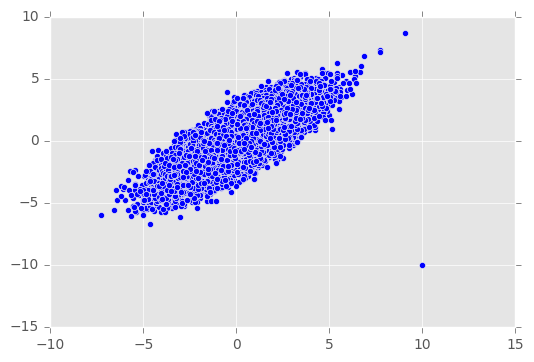

In [15]:
%%time

# gibbs sampling

x_1 = [10]
x_2 = [-10]

for _ in range(num_iter):
    x_1_new = numpy.random.normal(a*x_1[-1], 1)
    x_1.append(x_1_new)
    x_2_new = numpy.random.normal(a*x_1_new,1)
    x_2.append(x_2_new)
pyplot.scatter(x_1, x_2)

## 棄却サンプリング

* 一様分布から乱数を発生させる
* 分布の形がめちゃくちゃ尖ってたりすると十分な近似を得るのにかなりのサンプリングをしないといけない
    - たくさんのサンプルが棄却されてしまう

In [23]:
# gaussian distribution (mean=0, variance=1)
from math import pi

def p(x):
    return numpy.exp(-x**2/2) / (numpy.sqrt(2*pi))

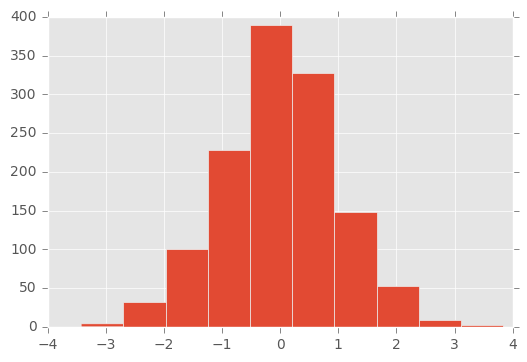

In [25]:
# rejection sampling

def rejection_sampler(num_iter):
    MAX = p(0)    
    samples = list()
    for _ in range(num_iter):    
        sample = (numpy.random.random() - 0.5) * 20.0
        if (p(sample) / MAX) > numpy.random.random():
            samples.append(sample)
    return samples

_ = pyplot.hist(rejection_sampler(10000))

# 多変量の正規分布の棄却サンプリング

$ p(x) = \frac{1}{\sqrt{2\pi} \sqrt{|\sum\|}}{ \exp{-\frac{1}{2} (\bf{x} - \bf{\mu})^T \sum^{-1}  (\bf{x} - \bf{\mu})} }$

In [37]:
def costum_random():
    return (numpy.random.random()-0.5) * 20

def p(cov, mu, x):
    numerator = numpy.exp(-(x-mu).T.dot(numpy.linalg.pinv(cov)).dot(x-mu)/2)
    denominator = numpy.sqrt(2*pi) * numpy.sqrt(numpy.linalg.norm(cov))
    return numerator / denominator

def p_given_x_i(cov, mu, x_i, x):
    1

# パラメータ

$ \sum = \biggl( \matrix{2 & 0 & 0 \\ 0 & 4 & 0 \\ 0 & 0 & 10} \biggr) $

$ \mu = \left( 0, 0, 0 \right)^T $

In [38]:
num_iter = 10000

cov = numpy.array([[2,0,0],[0,4,0], [0,0,10]])
mu = numpy.array([0,0,0])
# cov = numpy.array([[1,0],[0,1]])
# mu = numpy.array([0,0])
MAX = p(cov, mu, mu)

0.9813


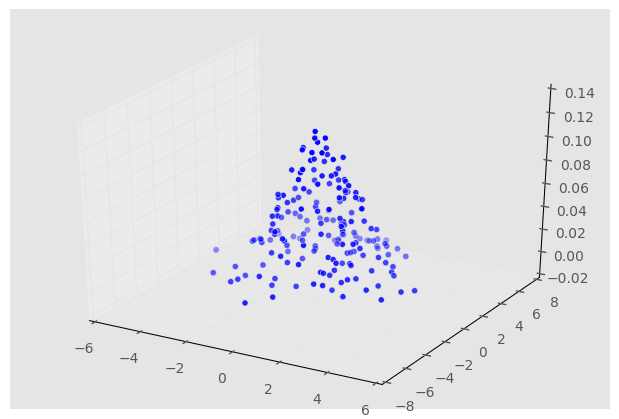

In [42]:
from mpl_toolkits.mplot3d import Axes3D

x_1s = list()
x_2s = list()
x_3s = list()
ys = list()

for _ in range(num_iter):
    x_1, x_2, x_3 = costum_random(), costum_random(), costum_random()
    x = numpy.array([x_1, x_2, x_3])
    y = p(cov, mu, x)
    if (y/MAX) > numpy.random.random():
        x_1s.append(x_1)
        x_2s.append(x_2)
        x_3s.append(x_3)
        ys.append(p(cov, mu, x))
                
fig = pyplot.figure()
ax = Axes3D(fig)
plot = ax.scatter(x_1s, x_2s, ys)

print(1 - (len(ys)/num_iter))